In [6]:
import os
import json
import random
import shutil
import ast
import matplotlib.pyplot as plt 

### Paths

In [7]:
config_id=8

In [8]:
results=f"/home/ids/gbrison/FC/fc-clip/alliteration_void_conv/output_r50_train_00{config_id}/json_results.json"

In [9]:
def get_evolution_of_pq(path):
        with open(path, 'r') as json_file:
            data = json.load(json_file) 
        all_results={}
        class_results=[{} for i in range(34)]
        for i in data: 
            all_results[int(i)]=ast.literal_eval(data[i])["All"]['pq'] 
            per_class=ast.literal_eval(data[i])['per_class']
            for j in per_class:
                class_results[j][i]=per_class[j]["pq"]
        return all_results, class_results

In [10]:
all_results, class_results=get_evolution_of_pq(results)


In [11]:
def plot_results(all_results, class_results, all=True, stuff=True, things=True, separated=False, conf=0):

    figsize=(10, 6)
    if all: 
        plt.figure(figsize=figsize)
        plt.plot(all_results.keys(),all_results.values(), label="All")
        plt.xlabel('Epoch')
        plt.ylabel('PQ')
        plt.title(f'Conf 00{conf}: Evolution of PQ according to epoche (mean of all class)')  
        plt.legend()
        # Show plot
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    

    if stuff:
        if not separated:
            plt.figure(figsize=figsize)

        for i in range(len(class_results)):
            if len(class_results[i].values())>0 and i<= 23:
                if separated:
                    plt.figure(figsize=figsize)
                    plt.plot(all_results.keys(),class_results[i].values(), label="cl-"+str(i))
                    plt.xlabel('Epoch')
                    plt.ylabel('PQ')
                    plt.title(f'Conf 00{conf}: Evolution of PQ according to epoche for the class'+str(i)) 
                    plt.legend()
                    # Show plot
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                else:
                    plt.plot(all_results.keys(),class_results[i].values(), label="cl-"+str(i))
    if not separated:
        plt.xlabel('Epoch')
        plt.ylabel('PQ')
        plt.title(f'Conf 00{conf}: Evolution of PQ according to epoche for all classes (Stuff)') 
        plt.legend()

        # Show plot
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=figsize)

    if things:
        for i in range(len(class_results)):
            if len(class_results[i].values())>0 and i> 23:
                if separated:
                    plt.figure(figsize=figsize)
                    plt.plot(all_results.keys(),class_results[i].values(), label="cl-"+str(i))
                    plt.xlabel('Epoch')
                    plt.ylabel('PQ')
                    plt.title(f'Conf 00{conf}: Evolution of PQ according to epoche for the class'+str(i)) 
                    plt.legend()
                    # Show plot
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

                else:
                    plt.plot(all_results.keys(),class_results[i].values(), label="cl-"+str(i))
    if not separated:
        plt.xlabel('Epoch')
        plt.ylabel('PQ')
        plt.title(f'Conf 00{conf}: Evolution of PQ according to epoche for all classes (Things)') 
        plt.legend()

        # Show plot
        plt.grid(True)
        plt.tight_layout()
        plt.show()


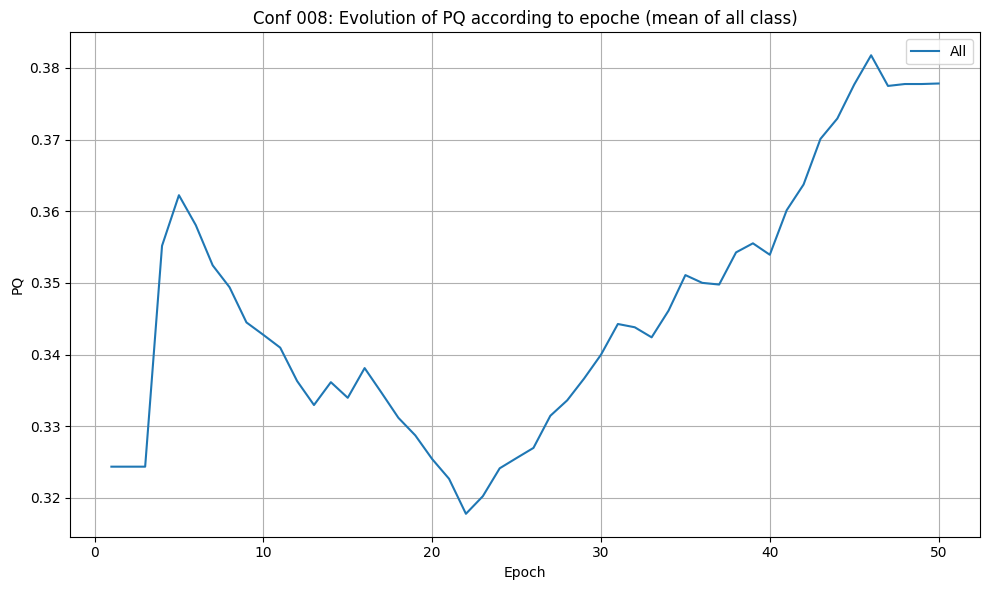

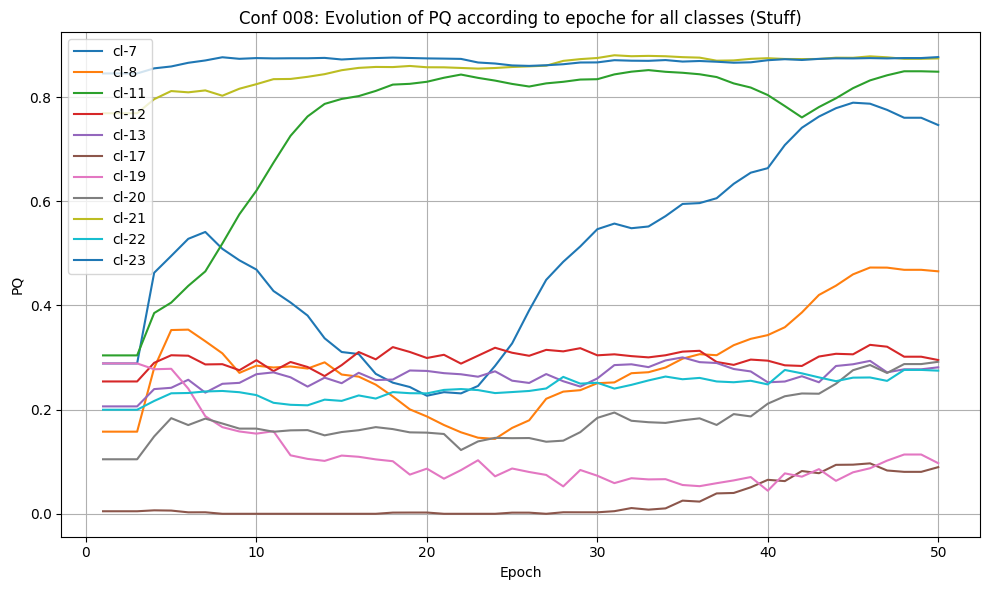

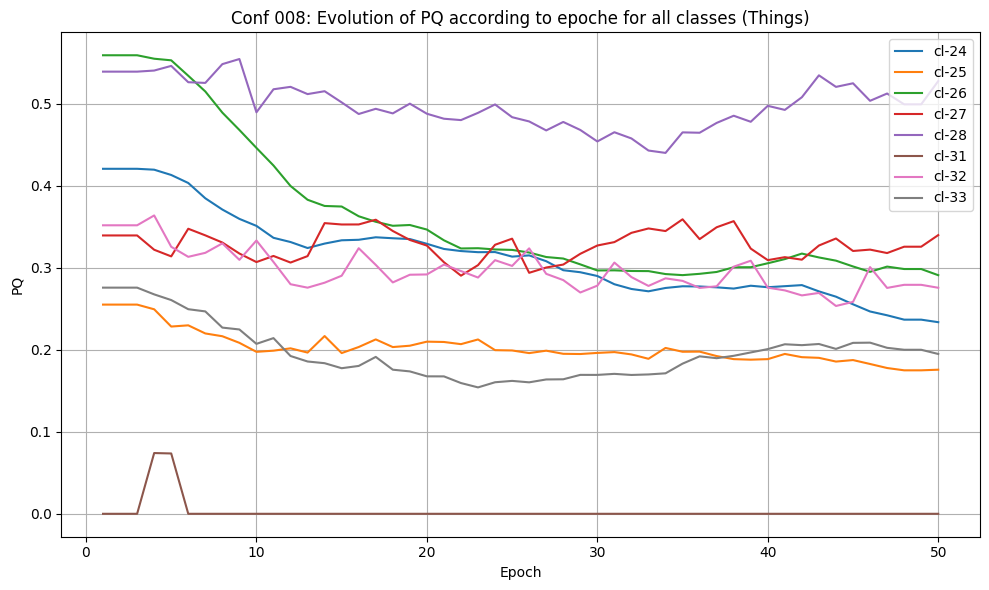

In [12]:
plot_results(all_results, class_results, separated=False, conf=config_id)